## RVT vis module

This example notebook shows how to create visualizations with the rvt.vis module.

### Before you start
You'll need a DEM to work through this notebook. 

Download the test data from [Getting started](https://rvt-py.readthedocs.io/en/latest/start_main.html), or have some of your own data ready to work with. 

Save your data in a directory called test_data. You'll need to set a path to this test data in cell [2].

----

First, let's import the required modules.

To load the DEM file into a numpy array and to store visualizations back to GeoTIFF, we will be using rvt.default module (which is based on the Python gdal library). 

You can also use rasterio, gdal or any other Python library.

In [1]:
import rvt.vis  # fro calculating visualizations
import rvt.default  # for loading/saving rasters
import numpy as np
import matplotlib.pyplot as plt  # to plot visualizations

In the test_data directory is a file called "TM1_564_146.tif". This will be our test DEM, from which we will be calculating visualizations. 

Define a string with the path to this file (input_dem_path).

In [2]:
dem_path = r"../test_data/TM1_564_146.tif"

This module has the function get_raster_arr() which reads a raster from a raster path and returns a dictionary with the keys "array", "resolution" and "no_data":

- "array" is the numpy array of the raster
- "resolution" is a tuple representing the raster's size in pixels, where the first element is the pixel size in x direction and the second is in y direction.
- "no_data" is the value which represents noData in the raster (array).

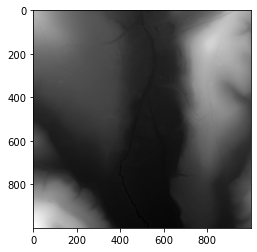

In [3]:
dict_dem = rvt.default.get_raster_arr(dem_path)
dem_arr = dict_dem["array"]  # numpy array of DEM
dem_resolution = dict_dem["resolution"]
dem_res_x = dem_resolution[0]  # resolution in X direction
dem_res_y = dem_resolution[1]  # resolution in Y direction
dem_no_data = dict_dem["no_data"]

plt.imshow(dem_arr, cmap='gray')

### RVTVisualization functions

All of the visualization functions take a DEM array as an input parameter. 

They also take some parameters which are specific for each visualization, as well as common parameters: 
- ve_factor (vertical exaggeration factor, multipy factor)
- no_data (value that represents no_data, every function replace all no_data value in array with np.nan)

The no_data parameter is represented as np.nan. Before every visualization function starts computing a visualization it changes no_data to np.nan.

Some visualization functions return a dictionary which contains the numpy array of visualization, some return the numpy array of visualization directly. 

### Slope

To calculate slope use the rvt.vis.slope_aspect() function. 

This function takes the parameters:

- dem
- resolution_x
- resolution_y
- output_units (can be: percent, degree, radian)
- ve_factor
- no_data. 

This function outputs a dictonary with the keys "slope" and "aspect". Each key contains a numpy array.

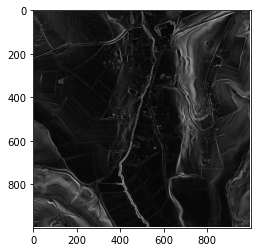

In [4]:
dict_slope_aspect = rvt.vis.slope_aspect(dem=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y, 
                                         output_units="degree", ve_factor=1, no_data=dem_no_data)
slope_arr = dict_slope_aspect["slope"]

plt.imshow(slope_arr, cmap='gray')

To save the visualization use the rvt.default.save_raster() function.

This function takes the parameters:

- src_raster_path (dem path to copy geodata)
- out_raster_path (visualization path)
- out_raster_arr (visualization numpy array)
- no_data (how is no data stored, all the visualizations no_data is stored as np.nan)
- e_type (GDALDataType, for example 6 is for float32 and 1 is for uint8)

In [5]:
slope_path = r"../test_data/TM1_564_146_slope.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=slope_path, out_raster_arr=slope_arr, no_data=np.nan,
                        e_type=6)

### Hillshade

To calculate a hillshade use the rvt.vis.hillshade() function. 

This function takes the parameters:

- dem
- resolution_x
- resolution_y
- sun_azimuth
- sun_elevation
- ve_factor
- no_data. 

This function outputs a numpy array of the hillshade.

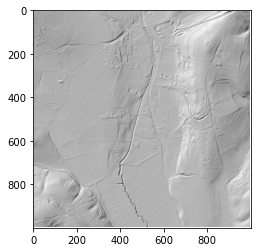

In [6]:
sun_azimuth = 315  # Solar azimuth angle (clockwise from North) in degrees
sun_elevation = 45  # Solar vertical angle (above the horizon) in degrees
hillshade_arr = rvt.vis.hillshade(dem=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y,
                                  sun_azimuth=sun_azimuth, sun_elevation=sun_elevation, ve_factor=1)

plt.imshow(hillshade_arr, cmap='gray')

In [7]:
hillshade_path = r"../test_data/TM1_564_146_hillshade.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=hillshade_path, out_raster_arr=hillshade_arr, no_data=np.nan,
                        e_type=6)

### Multiple direction hillshade

To calculate a multiple direction hillshade use the rvt.vis.multi_hillshade() function. 

This function takes the parameters:

- dem
- resolution_x
- resolution_y
- nr_directions
- sun_elevation
- ve_factor
- no_data

This function ouputs a 3D numpy array, where the first dimension represents each direction (nr_directions), e.g. arr[0] is the first direction.To calculate multiple directions hillshade use rvt.vis.multi_hillshade() function. Parameters are: dem, resolution_x, resolution_y, nr_directions, sun_elevation, ve_factor, no_data. Function ouputs 3D numpy array (where first dimension represents each direction (nr_directions), for example arr[0] is first direction).

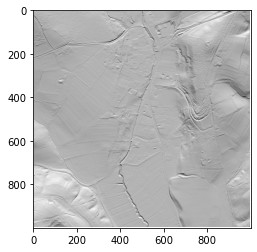

In [8]:
nr_directions = 16  # Number of solar azimuth angles (clockwise from North) (number of directions, number of bands)
sun_elevation = 45  # Solar vertical angle (above the horizon) in degrees
multi_hillshade_arr = rvt.vis.multi_hillshade(dem=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y,
                                              nr_directions=nr_directions, sun_elevation=sun_elevation, ve_factor=1,
                                              no_data=dem_no_data)

plt.imshow(multi_hillshade_arr[0], cmap='gray')  # plot first direction where solar azimuth = 22.5 (360/16=22.5)

When saving multiple direction hillshade array, each direction (solar azimuth) will be saved in one band.

In [9]:
multi_hillshade_path = r"../test_data/TM1_564_146_multi_hillshade.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=multi_hillshade_path, out_raster_arr=multi_hillshade_arr,
                        no_data=np.nan, e_type=6)

### Simple Local Relief Model (SLRM)

To calculate a Simple Local Relief Model (SLRM) use the rvt.vis.simple_local_relief_model() function. 

This function takes the parameters:

- dem
- radius_cell
- ve_factor
- no_data.

This function returns a numpy array of the SLRM.

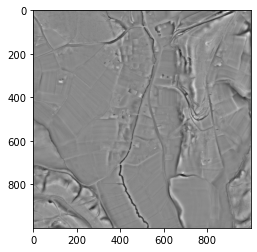

In [10]:
radius_cell = 15  # radius to consider in pixels (not in meters)
slrm_arr = rvt.vis.simple_local_relief_model(dem=dem_arr, radius_cell=radius_cell, ve_factor=1, no_data=dem_no_data)

plt.imshow(slrm_arr, cmap='gray')

In [11]:
slrm_path = r"../test_data/TM1_564_146_slrm.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=slrm_path, out_raster_arr=slrm_arr,
                        no_data=np.nan, e_type=6)

### Multi-Scale Relief Model (MSRM)

To calculate a Multi-Scale Relief Model (MSRM) use the rvt.vis.multi_scale_relief_model() function.

This function takes the parameters: 

- dem
- resolution
- feature_min
- feature_max
- scaling_factor
- ve_factor
- no_data. 

This function returns a numpy array of the MSRM.

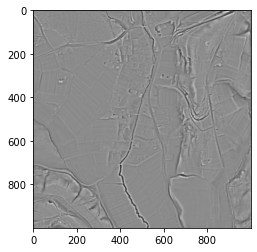

In [12]:
feature_min = 1  # minimum size of the feature you want to detect in meters
feature_max = 5  # maximum size of the feature you want to detect in meters
scaling_factor = 3  # scaling factor
msrm_arr = rvt.vis.multi_scale_relief_model(dem=dem_arr, resolution=dem_res_x, feature_min=feature_min, feature_max=feature_max, 
                        scaling_factor=scaling_factor, ve_factor=1, no_data=dem_no_data)

plt.imshow(msrm_arr, cmap='gray')

In [13]:
msrm_path = r"../test_data/TM1_564_146_msrm.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=msrm_path, out_raster_arr=msrm_arr,
                        no_data=np.nan, e_type=6)

### Sky-view factor, anisotropic sky-view factor & positive openness

Sky-view factor, anisotropic sky-view factor and positive openness are all calculated with the same function: rvt.vis.horizon_visualizations(). 

This function takes the parameters:

- dem
- resolution
- compute_svf (bool, if true it computes sky-view factor)
- compute_asvf (bool, if true it computes anisotropic svf)
- copmute_opns (bool, if true it computes positive openness)
- svf_n_dir (number of directions)
- svf_r_max (maximal search radius in pixels)
- svf_noise (level of noise remove (0-don't remove, 1-low, 2-med, 3-high))
- asvf_level (level of anisotropy, 1-low, 2-high)
- asvf_dir (direction of anisotropy), ve_factor, no_data. 

This function outputs a dictionary with the keys: 

- "svf" (if copute_svf is true)
- "asvf" (if copute_asvf is true)
- "opns" (if copute_opns is true)

Each key contains a numpy array of the visualization.

In [14]:
# svf, sky-view factor parameters which also applies to asvf and opns
svf_n_dir = 16  # number of directions
svf_r_max = 10  # max search radius in pixels
svf_noise = 0  # level of noise remove (0-don't remove, 1-low, 2-med, 3-high)
# asvf, anisotropic svf parameters
asvf_level = 1  # level of anisotropy (1-low, 2-high)
asvf_dir = 315  # dirction of anisotropy in degrees
dict_svf = rvt.vis.horizon_visualizations(dem=dem_arr, resolution=dem_res_x, compute_svf=True, compute_asvf=True, compute_opns=True,
                                   svf_n_dir=svf_n_dir, svf_r_max=svf_r_max, svf_noise=svf_noise,
                                   asvf_level=asvf_level, asvf_dir=asvf_dir,
                                   no_data=dem_no_data)
svf_arr = dict_svf["svf"]  # sky-view factor
asvf_arr = dict_svf["asvf"]  # anisotropic sky-view factor
opns_arr = dict_svf["opns"]  # positive openness

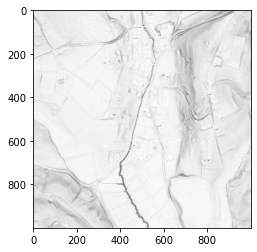

In [15]:
plt.imshow(svf_arr, cmap='gray')

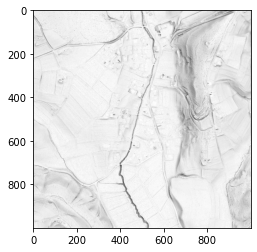

In [16]:
plt.imshow(asvf_arr, cmap='gray')

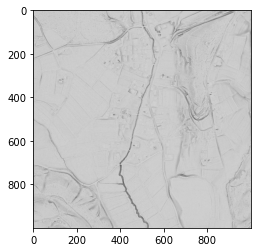

In [17]:
plt.imshow(opns_arr, cmap="gray")

To save:

In [18]:
svf_path = r"../test_data/TM1_564_146_svf.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=svf_path, out_raster_arr=svf_arr,
                        no_data=np.nan, e_type=6)
asvf_path = r"../test_data/TM1_564_146_asvf.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=asvf_path, out_raster_arr=asvf_arr,
                        no_data=np.nan, e_type=6)
opns_path = r"../test_data/TM1_564_146_pos_opns.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=opns_path, out_raster_arr=opns_arr,
                        no_data=np.nan, e_type=6)

### Negative openness

Negative openness is calculated the same as postive openness, but we have to multiply the input DEM by -1.

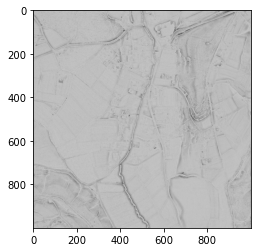

In [19]:
# svf, sky-view factor parameters which also applies to asvf and opns
svf_n_dir = 16  # number of directions
svf_r_max = 10  # max search radius in pixels
svf_noise = 0  # level of noise remove (0-don't remove, 1-low, 2-med, 3-high)
dem_arr_neg_opns = dem_arr * -1  # dem * -1 for neg opns 
# we don't need to calculate svf and asvf (compute_svf=False, compute_asvf=False)
dict_svf = rvt.vis.horizon_visualizations(dem=dem_arr_neg_opns, resolution=dem_res_x, compute_svf=False, compute_asvf=False, compute_opns=True,
                                   svf_n_dir=svf_n_dir, svf_r_max=svf_r_max, svf_noise=svf_noise,
                                   no_data=dem_no_data)
neg_opns_arr = dict_svf["opns"]

plt.imshow(neg_opns_arr, cmap='gray')

In [20]:
neg_opns_path = r"../test_data/TM1_564_146_neg_opns.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=neg_opns_path, out_raster_arr=neg_opns_arr,
                        no_data=np.nan, e_type=6)

### Local dominance

To calculate local dominance use the rvt.vis.local_dominance() function. 

This function takes the parameters:

- dem
- min_rad (minimum radial distance (in pixels) at which the algorithm starts with visualization computation)
- max_rad (maximum radial distance (in pixels) at which the algorithm starts with visualization computation)
- rad_inc (radial distance steps in pixels)
- angular_res (angular step for determination of number of angular directions)
- observer_height (height at which we observe the terrain)
- ve_factor
- no_data. 

This function outputs a numpy array of local dominance.

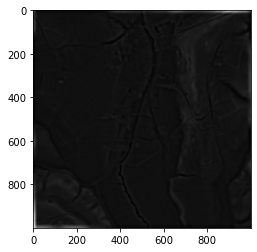

In [21]:
min_rad = 10  # minimum radial distance
max_rad = 20  # maximum radial distance
rad_inc = 1  # radial distance steps in pixels
angular_res = 15 # angular step for determination of number of angular directions
observer_height = 1.7  # height at which we observe the terrain
local_dom_arr = rvt.vis.local_dominance(dem=dem_arr, min_rad=min_rad, max_rad=max_rad, rad_inc=rad_inc, angular_res=angular_res,
                                       observer_height=observer_height, ve_factor=1,
                                       no_data=dem_no_data)

plt.imshow(local_dom_arr, cmap='gray')

In [22]:
local_dom_path = r"../test_data/TM1_564_146_local_dominance.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=local_dom_path, out_raster_arr=local_dom_arr,
                        no_data=np.nan, e_type=6)

### Sky illumination

To calculate sky illumination use the rvt.vis.sky_illumination() function. 

This function takes the parameters:

- dem
- resolution
- sky_model ("overcast" or "uniform")
- compute_shadow (boolean if true it adds shadow)
- max_fine_radius (max shadow modeling distance in pixels)
- num_directions (number of directions to search for horizon)
- shadow_az (shadow azimuth if copute_shadow is true)
- shadow_el (shadow elevation if compute_shadow is true)
- ve_factor
- no_data. 

This function outputs the numpy array of sky illumination.

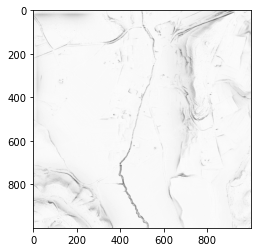

In [23]:
sky_model = "overcast"  # could also be uniform
max_fine_radius = 100
num_directions = 32
compute_shadow = True
shadow_az = 315
shadow_el = 35
sky_illum_arr = rvt.vis.sky_illumination(dem=dem_arr, resolution=dem_res_x, sky_model=sky_model,
                                         max_fine_radius=max_fine_radius, num_directions=num_directions,
                                         shadow_az=shadow_az, shadow_el=shadow_el, ve_factor=1,
                                         no_data=dem_no_data)

plt.imshow(sky_illum_arr, cmap='gray')

In [24]:
sky_illum_path = r"../test_data/TM1_564_146_sky_illumination.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=sky_illum_path, out_raster_arr=sky_illum_arr,
                        no_data=np.nan, e_type=6)

### Multi-Scale Topographic Position (MSTP)

To calculate Multi-Scale Topographic Position (MSTP) use the rvt.vis.multi_scale_topographic_position() function. 

This function takes the parameters:
- dem
- local_scale (tuple where first element is local scale min, second is local scale max and third is local scale step)
- meso scale (tuple of min, max, step for meso scale)
- broad scale (tuple of min, max, step for broad scale)
- lightness (parameter to control visualization lightness)
- ve_factor
- no_data

This function outputs a 3D RGB 8bit numpy array of MSTP.

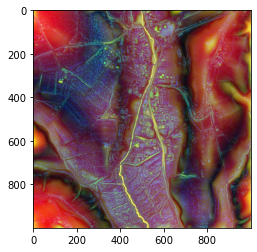

In [25]:
local_scale=(1, 5, 1)  # min, max, step
meso_scale=(5, 50, 5)  # min, max, step
broad_scale=(50, 500, 50)  # min, max, step
lightness=1.2  # best results from 0.8 to 1.6
mstp_arr = rvt.vis.multi_scale_topographic_position(dem=dem_arr, local_scale=local_scale, meso_scale=meso_scale,
                        broad_scale=broad_scale, lightness=lightness, ve_factor=1, no_data=dem_no_data)

# to show image in matplotlib we have to normalize visualization and rearrange it
# import blend_func modulte which contain function for noramlization
import rvt.blend_func  
# normalize visualization from 0-255 to 0-1
mstp_floar_arr = rvt.blend_func.normalize_lin(image=mstp_arr, minimum=0, maximum=255)
# rearrange visualization from np.array([r, g, b]) to form that is supported by matplotlib and display it
plt.imshow(np.dstack((mstp_floar_arr[0],mstp_floar_arr[1],mstp_floar_arr[2])))

In [26]:
mstp_path = r"../test_data/TM1_564_146_MSTP.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=mstp_path, out_raster_arr=mstp_arr,
                        no_data=np.nan, e_type=1)  # e_type has to be 1 because visualization is 8-bit (0-255)